- Étapes d’analyse et de visualisation avec Matplotlib

In [2]:
import pandas as pd

In [29]:
# Chargement du fichier CSV : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

from pandas import read_csv


df= read_csv("diabetes_dataset.csv")
# Afficher les premières lignes du dataset
display(df.head())

# Afficher des informations générales sur le dataset
print(df.info())

# Statistiques descriptives
display(df.describe())


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35,0,33.6,0.627,50.0,1
1,1.0,85,66,29,0,26.6,0.351,31.0,0
2,8.0,183,64,0,0,23.3,0.672,NaN,1
3,1.0,89,66,23,94,28.1,0.167,21.0,0
4,0.0,137,40,35,168,43.1,2.288,33.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               722 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,722.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,614.000000,768.000000
mean,3.818560,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,32.907166,0.348958
std,3.359882,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.503437,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
# Groupez les données par la colonne 'Outcome' et 
# calculez des statistiques pour chaque groupe
df_grouped = df.groupby('Outcome') #.agg(['mean', 'std', 'min', 'max'])
display(df_grouped.describe())

# Moyenne des colonnes pour chaque groupe (0 = pas de diabète, 1 = diabète)
display(df_grouped.mean())


Pregnancies                                               Glucose  \
              count      mean       std  min  25%  50%  75%   max   count   
Outcome                                                                     
0             471.0  3.218684  2.984526  0.0  1.0  2.0  5.0  13.0   500.0   
1             251.0  4.944223  3.723020  0.0  2.0  5.0  8.0  17.0   268.0   

                     ... DiabetesPedigreeFunction           Age             \
               mean  ...                      75%    max  count       mean   
Outcome              ...                                                     
0        109.980000  ...                  0.56175  2.329  401.0  30.556110   
1        141.257463  ...                  0.72800  2.420  213.0  37.333333   

                                                  
               std   min   25%   50%   75%   max  
Outcome                                           
0        11.083207  21.0  23.0  26.0  35.0  81.0  
1        10.987414  21.0  28.0  36.0  45.0  70.0  

[2 rows x 64 columns]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.218684,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,30.556110
1,4.944223,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.333333


In [38]:
# Avant l'imputation
print("Valeurs manquantes AVANT l'imputation :")
print(df.isnull().sum())
df1 = df.copy()
# Imputation de la colonne Age uniquement
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Après l'imputation
print("\nValeurs manquantes APRÈS l'imputation :")
print(df.isnull().sum())


Valeurs manquantes AVANT l'imputation :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Valeurs manquantes APRÈS l'imputation :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


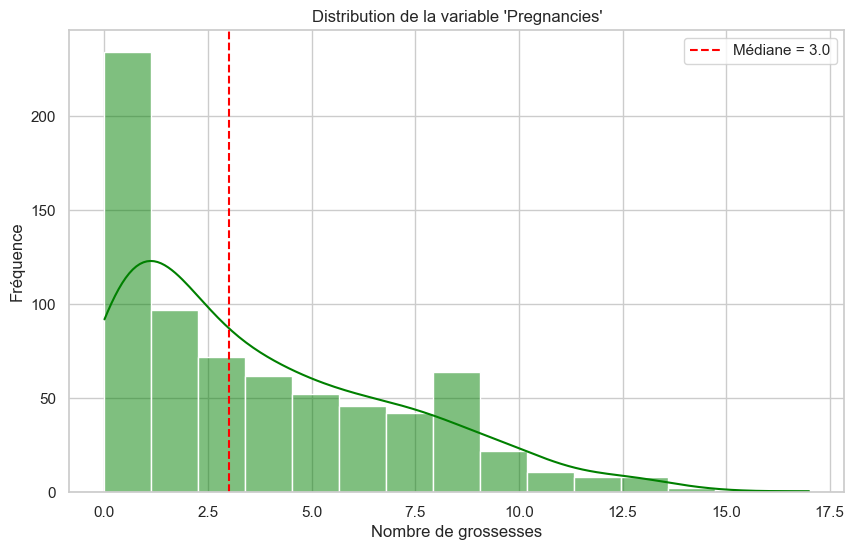

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme de la variable Pregnancies
plt.figure(figsize=(10, 6))
sns.histplot(df['Pregnancies'], bins=15, kde=True, color='green')

# Ajout de la médiane en ligne verticale
median_value = df['Pregnancies'].median()
plt.axvline(median_value, color='red', linestyle='--', label=f'Médiane = {median_value:.1f}')

plt.title("Distribution de la variable 'Pregnancies'")
plt.xlabel("Nombre de grossesses")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

In [36]:
# Imputation de la colonne Age uniquement
df['Pregnancies'] = df['Pregnancies'].fillna(df['Pregnancies'].mean())

# Après l'imputation
print("\nValeurs manquantes APRÈS l'imputation :")
print(df.isnull().sum())


Valeurs manquantes APRÈS l'imputation :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


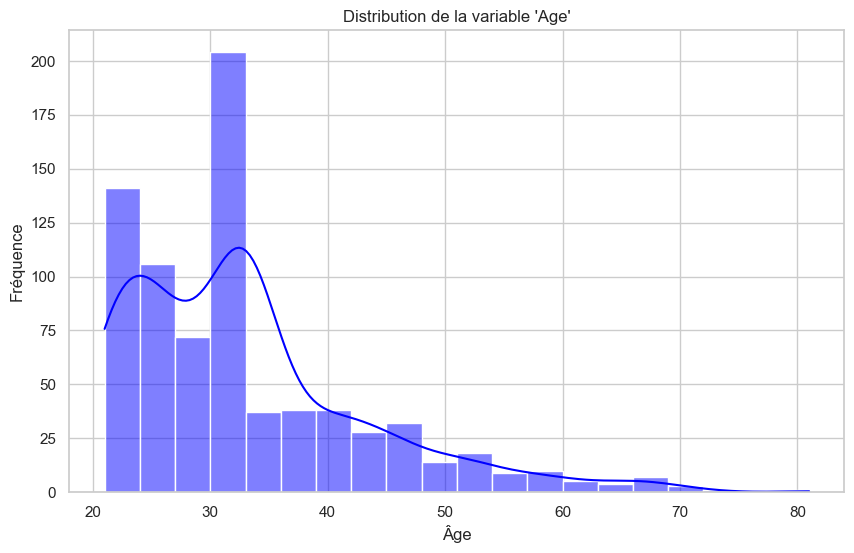

In [37]:
# Créez un histogramme pour visualiser la distribution d'une variable  comme l'âge des patients. 
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title("Distribution de la variable 'Age'")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

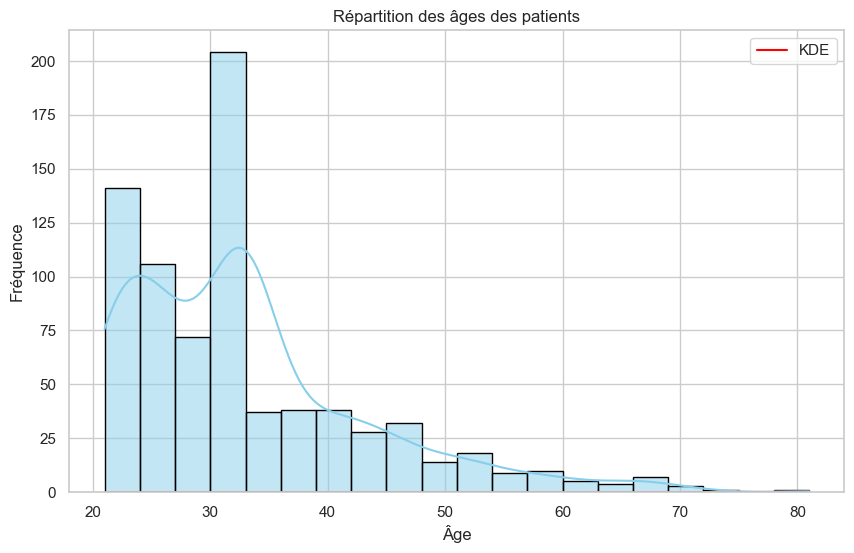

In [46]:
import numpy as np
from scipy.stats import gaussian_kde

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Répartition des âges des patients')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
# Histogram
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.6, density=True)

# KDE with matplotlib (using scipy)
kde = gaussian_kde(df['Age'])
x_vals = np.linspace(df['Age'].min(), df['Age'].max(), 200)
plt.plot(x_vals, kde(x_vals), color='red', label='KDE')

plt.legend()
plt.show()

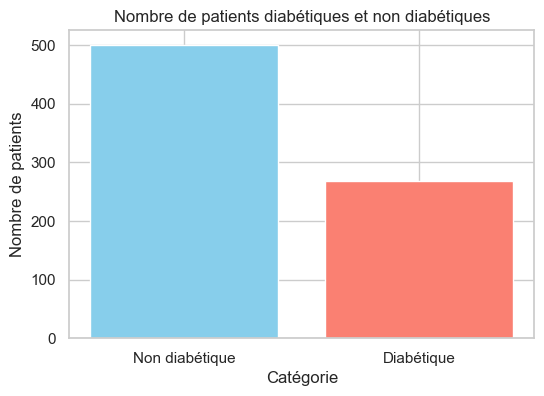

In [51]:
# Comptage du nombre de patients diabétiques et non diabétiques
counts = df['Outcome'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(['Non diabétique', 'Diabétique'], counts.sort_index(), color=['skyblue', 'salmon'])
plt.title("Nombre de patients diabétiques et non diabétiques")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de patients")
plt.show()

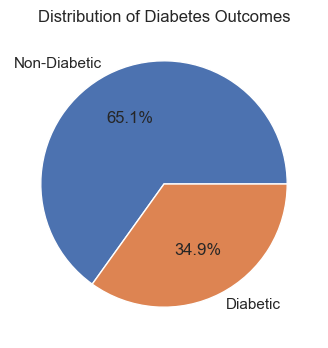

In [52]:
# Diagramme circulaire (Pie chart)
plt.figure(figsize=(6, 4))
plt.pie(df['Outcome'].value_counts(), labels=['Non-Diabetic', 'Diabetic'], autopct='%1.1f%%')
plt.title('Distribution of Diabetes Outcomes')
plt.show()


C:\Users\bouma12\AppData\Local\Temp\ipykernel_16732\879851540.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


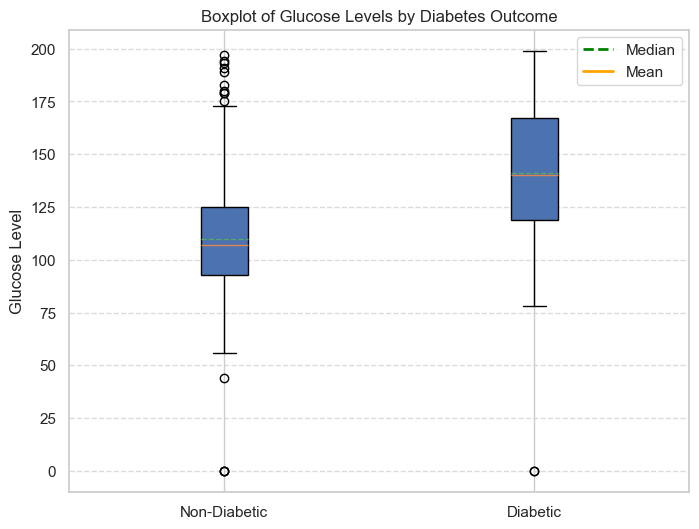

In [66]:
plt.figure(figsize=(8, 6))
box = plt.boxplot(
    [df[df['Outcome'] == 0]['Glucose'], df[df['Outcome'] == 1]['Glucose']],
    labels=['Non-Diabetic', 'Diabetic'],
    patch_artist=True,
    showmeans=True,
    meanline=True
)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Boxplot of Glucose Levels by Diabetes Outcome')
plt.ylabel('Glucose Level')

# Add legend explaining median and mean lines
median_line = plt.Line2D([0], [0], color='green', lw=2, label='Median', linestyle='--')
mean_line = plt.Line2D([0], [0], color='orange', lw=2, label='Mean')
plt.legend(handles=[median_line, mean_line])

plt.show()


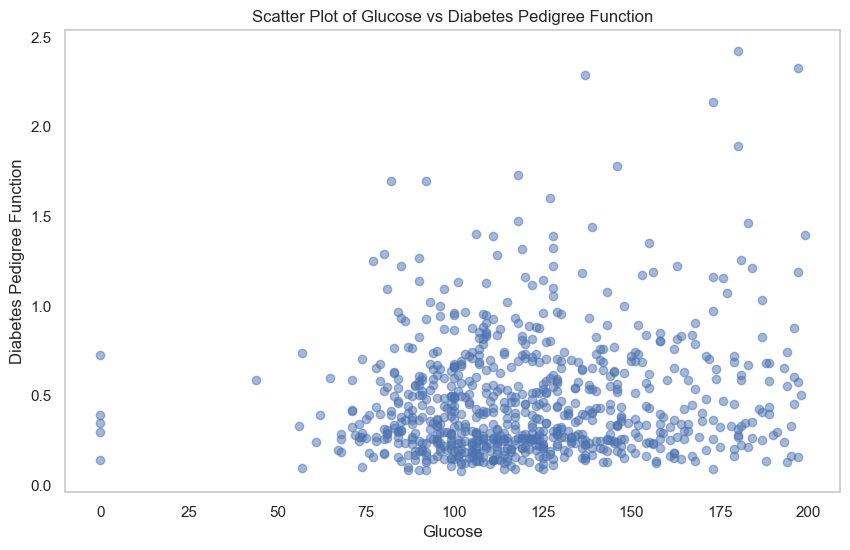

In [73]:
# Scatter Plot
# Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction
plt.figure(figsize=(10, 6))
plt.scatter(df['Glucose'], df['DiabetesPedigreeFunction'], alpha=0.5)
plt.title('Scatter Plot of Glucose vs Diabetes Pedigree Function')
plt.xlabel('Glucose')
plt.ylabel('Diabetes Pedigree Function')
plt.grid()
plt.show()